<a href="https://colab.research.google.com/github/kivvgsr/deep-learning/blob/main/email_bert.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip uninstall tensorflow tensorflow-text tensorflow-hub -y


Found existing installation: tensorflow 2.16.1
Uninstalling tensorflow-2.16.1:
  Successfully uninstalled tensorflow-2.16.1
Found existing installation: tensorflow-text 2.16.1
Uninstalling tensorflow-text-2.16.1:
  Successfully uninstalled tensorflow-text-2.16.1
Found existing installation: tensorflow-hub 0.16.1
Uninstalling tensorflow-hub-0.16.1:
  Successfully uninstalled tensorflow-hub-0.16.1


In [2]:

# https://drive.google.com/file/d/1iCEza2eRy5qZkmIJKc4WNQfuUHAFlUzt/view?usp=sharing


file_id = "1iCEza2eRy5qZkmIJKc4WNQfuUHAFlUzt"
url = f"https://drive.google.com/uc?id={file_id}"

# Define the local file path where you want to save the dataset
output_path = "/content/dataset.csv"

# Download the dataset using gdown
import gdown
gdown.download(url, output_path, quiet=False)
encoding = "ISO-8859-1"

# Now you can read the dataset using pandas or any other relevant library
import pandas as pd
df = pd.read_csv(output_path,encoding=encoding)

Downloading...
From: https://drive.google.com/uc?id=1iCEza2eRy5qZkmIJKc4WNQfuUHAFlUzt
To: /content/dataset.csv
100%|██████████| 504k/504k [00:00<00:00, 95.1MB/s]


In [3]:
df.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [5]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'],axis=1,inplace=True)

In [6]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [7]:
df.groupby('v1').describe()

v2                                                               
     count unique                                                top freq
v1                                                                       
ham   4825   4516                             Sorry, I'll call later   30
spam   747    653  Please call our customer service representativ...    4

# here we are getting imbalace in the spam and hamemails . hence we perform the

DOWNSAMPLING TECHNIQUE
!!! in this we will take only the 1499 samples of ham out of 3672 and discart the rest

In [8]:
# lets create a seperate dataframe for spam
df_spam =df[df['v1']=='spam']
df_spam.shape

(747, 2)

In [9]:
df_spam.head()

,v1,v2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."


In [10]:
df_ham =df[df['v1']=='ham']
df_ham.shape

(4825, 2)

In [11]:
df_down_ham = df_ham.sample(df_spam.shape[0])
df_down_ham.shape

(747, 2)

In [12]:
df_down_ham.head()

,v1,v2
5114,ham,Argh why the fuck is nobody in town ;_;
2699,ham,Oh baby of the house. How come you dont have a...
4659,ham,You call him and tell now infront of them. Cal...
370,ham,Hello my boytoy ... Geeee I miss you already a...
4322,ham,Aight well keep me informed


In [13]:
# lets perform the concatinstion on the both the samples
import pandas as pd

df_balanced = pd.concat([df_spam,df_down_ham])

In [14]:
df_balanced.shape

(1494, 2)

In [15]:
df_balanced['v1'].value_counts()

v1
spam    747
ham     747
Name: count, dtype: int64

In [16]:
df_balanced.sample(10)

,v1,v2
4337,ham,Yes when is the appt again?
4323,ham,I am not having her number sir
4674,spam,"Hi babe its Chloe, how r u? I was smashed on s..."
4154,spam,Want a new Video Phone? 750 anytime any networ...
5416,ham,My slave! I want you to take 2 or 3 pictures o...
5549,ham,"You know, wot people wear. T shirts, jumpers, ..."
2936,ham,Lol yep did that yesterday. Already got my fir...
93,spam,Please call our customer service representativ...
3497,ham,You said to me before i went back to bed that ...
591,spam,You have been specially selected to receive a ...


In [17]:
df_balanced['spam']=df_balanced['v1'].apply(lambda x: 1 if x=='spam' else 0)
df_balanced.sample(5)

,v1,v2,spam
641,ham,"said kiss, kiss, i can't do the sound effects...",0
1615,ham,Mm i had my food da from out,0
647,spam,PRIVATE! Your 2003 Account Statement for shows...,1
5201,spam,YOU VE WON! Your 4* Costa Del Sol Holiday or å...,1
468,ham,"Yup, no need. I'll jus wait 4 e rain 2 stop.",0


In [18]:
from sklearn.model_selection import train_test_split

x_train, x_test,y_train,y_test = train_test_split(df_balanced['v2'],df_balanced['spam'],stratify=df_balanced['spam'])

In [19]:
x_train.head()

1197     He also knows about lunch menu only da. . I know
3382    K... Must book a not huh? so going for yoga ba...
3238             Am okay. Will soon be over. All the best
2271    Life spend with someone for a lifetime may be ...
4582    For ur chance to win a å£250 wkly shopping spr...
Name: v2, dtype: object

# lets create the bard
preprocess_url = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"


encoder_url = "https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4"

In [20]:
!pip install tensorflow tensorflow-text tensorflow-hub


  Using cached tensorflow-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (589.8 MB)
  Using cached tensorflow_text-2.16.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (5.2 MB)
  Using cached tensorflow_hub-0.16.1-py2.py3-none-any.whl (30 kB)


In [21]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Import TensorFlow Text



In [22]:
bert_preprocess = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3')
bert_encoder = hub.KerasLayer('https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4')

In [23]:
# lets create a function
def sentence_embading(lines):
   preresult =  bert_preprocess(lines)
   return bert_encoder(preresult)['pooled_output']

In [24]:
sentence_embading(
    [
        'SOOOS discount , hurry up!',
        'hey are u going to movie tomorrow'
    ]
)

<tf.Tensor: shape=(2, 768), dtype=float32, numpy=
array([[-0.7207331 , -0.28069246, -0.7122172 , ..., -0.39849627,
        -0.59252423,  0.8053789 ],
       [-0.9336558 , -0.4612281 , -0.77982926, ..., -0.57781106,
        -0.7084253 ,  0.9406819 ]], dtype=float32)>

In [25]:
e = sentence_embading([
    "banana",
    "grapes",
    "mango",
    "jeff bezos",
    "elon musk",
    "bill gates"
]
)

In [26]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity([e[0]],[e[1]]) # this will give the similarity among them

array([[0.9911087]], dtype=float32)

# for the value close to one is near is most similar

In [27]:
cosine_similarity([e[0]],[e[4]])

array([[0.89336324]], dtype=float32)

# create the deeplearning model

In [28]:
x_train.head()

1197     He also knows about lunch menu only da. . I know
3382    K... Must book a not huh? so going for yoga ba...
3238             Am okay. Will soon be over. All the best
2271    Life spend with someone for a lifetime may be ...
4582    For ur chance to win a å£250 wkly shopping spr...
Name: v2, dtype: object

In [29]:
def encode_email(email):
    preprocessed_text = bert_preprocess(tf.constant([email]))
    encoded_text = bert_encoder(preprocessed_text)
    return encoded_text['pooled_output']

In [30]:
import numpy as np

In [31]:
encoded_train_emails = np.array([encode_email(email) for email in x_train])

In [32]:
encoded_test_emails = np.array([encode_email(email) for email in x_test])

In [36]:
# Define input layer using the pooled_output values
input_layer = tf.keras.layers.Input(shape=(768,), dtype=tf.float32, name='bert_output')

# Neural network layers
l = tf.keras.layers.Dropout(0.1, name="dropout")(input_layer)
l = tf.keras.layers.Dense(64, activation='relu', name="dense")(l)
output_layer = tf.keras.layers.Dense(1, activation='sigmoid', name="output")(l)

In [38]:
# Create the model
model = tf.keras.Model(inputs=[input_layer], outputs=[output_layer])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])



In [40]:
# Fit the model using the preprocessed training data
history = model.fit(encoded_train_emails, y_train, epochs=10, batch_size=32, validation_split=0.2)



Epoch 1/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9456 - loss: 0.1432 - val_accuracy: 0.9464 - val_loss: 0.1638
Epoch 2/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9375 - loss: 0.1898 - val_accuracy: 0.9598 - val_loss: 0.1448
Epoch 3/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9435 - loss: 0.1475 - val_accuracy: 0.9375 - val_loss: 0.1854
Epoch 4/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9566 - loss: 0.1377 - val_accuracy: 0.9554 - val_loss: 0.1370
Epoch 5/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9549 - loss: 0.1283 - val_accuracy: 0.9464 - val_loss: 0.1395
Epoch 6/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9638 - loss: 0.1115 - val_accuracy: 0.9375 - val_loss: 0.2105
Epoch 7/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9441 - loss: 0.1524 - val_accuracy: 0.9598 - val_loss: 0.1269
Epoch 8/10
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9533 - loss: 0.1347 - val_accuracy: 0.9598 - val_loss:

In [41]:
print(encoded_test_emails.shape)


(374, 1, 768)


In [42]:
print(model.input_shape)


(None, 768)


In [43]:
encoded_test_emails = encoded_test_emails.squeeze(axis=1)


In [44]:
loss, accuracy = model.evaluate(encoded_test_emails, y_test)
print(f'Test Loss: {loss}')
print(f'Test Accuracy: {accuracy}')


12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.9383 - loss: 0.1523
Test Loss: 0.15746234357357025
Test Accuracy: 0.9411764740943909


In [45]:
y_predicted = model.predict(encoded_test_emails)
y_predicted = y_predicted.flatten()

12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [46]:
import numpy as np

y_predicted = np.where(y_predicted > 0.5, 1, 0)
y_predicted

array([1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,

In [47]:
from sklearn.metrics import confusion_matrix, classification_report

cm = confusion_matrix(y_test, y_predicted)
cm

array([[172,  15],
       [  7, 180]])

Text(50.722222222222214, 0.5, 'Truth')

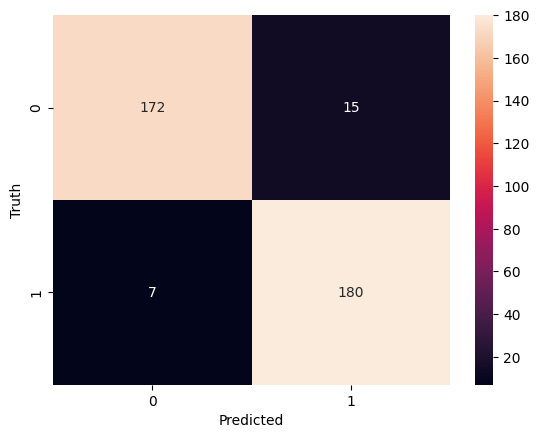

In [48]:
from matplotlib import pyplot as plt
import seaborn as sn
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [49]:
print(classification_report(y_test, y_predicted))

              precision    recall  f1-score   support

           0       0.96      0.92      0.94       187
           1       0.92      0.96      0.94       187

    accuracy                           0.94       374
   macro avg       0.94      0.94      0.94       374
weighted avg       0.94      0.94      0.94       374



In [58]:
import numpy as np

# List of reviews
reviews = [
    'Enter a chance to win $5000, hurry up, offer valid until march 31, 2021',
    'You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99',
    'it to 80488. Your 500 free text messages are valid until 31 December 2005.',
    'Hey Sam, Are you coming for a cricket game tomorrow',
    "Why don't you wait 'til at least wednesday to see if you get your ."
]

# Preprocess the reviews using the BERT preprocessing layer
preprocessed_reviews = np.array([encode_email(review) for review in reviews])

In [59]:
# Remove the extra dimension
preprocessed_reviews = preprocessed_reviews.squeeze(axis=1)

In [60]:
predictions = model.predict(preprocessed_reviews)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


In [61]:
for review, prediction in zip(reviews, predictions):
    print(f"Review: {review}")
    print(f"Spam Probability: {prediction[0]}")
    print()

Review: Enter a chance to win $5000, hurry up, offer valid until march 31, 2021
Spam Probability: 0.9823814034461975

Review: You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p pÂ£3.99
Spam Probability: 0.9973340034484863

Review: it to 80488. Your 500 free text messages are valid until 31 December 2005.
Spam Probability: 0.9633561968803406

Review: Hey Sam, Are you coming for a cricket game tomorrow
Spam Probability: 0.2181258201599121

Review: Why don't you wait 'til at least wednesday to see if you get your .
Spam Probability: 0.026295961812138557



#hamayya
:😂